# Procesos de Poisson

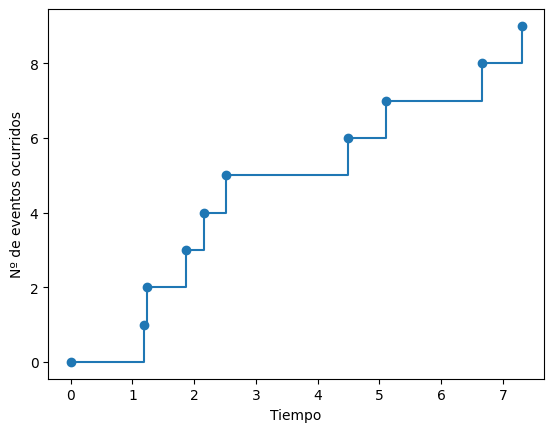

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def poisson_process(rate, n_events):
    time_intervals = -np.log(np.random.random(n_events)) / rate
    times = time_intervals.cumsum()
    events = np.arange(n_events)
    times = times - min(times) # Para comenzar en 0
    return times, events


times, events = poisson_process(1,10)
plt.plot(times, events, marker = 'o', drawstyle ='steps-post')
plt.xlabel('Tiempo')
plt.ylabel('Nº de eventos ocurridos')
plt.show()

### Código 


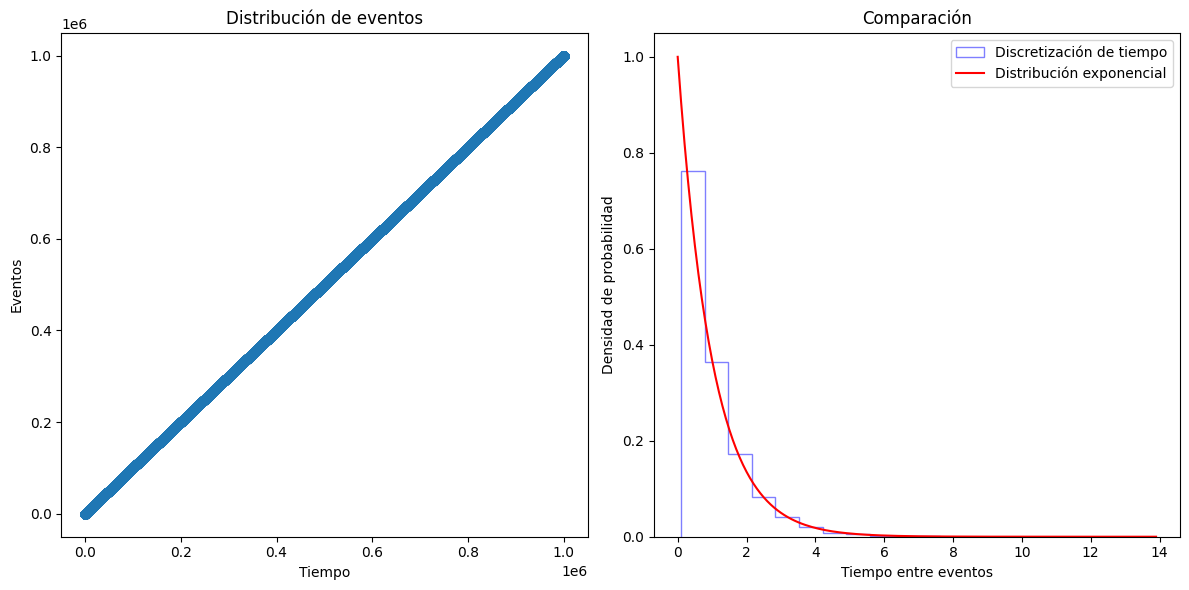

In [2]:
def poisson_process_discrete(rate, total_time, n_intervals):
    dt = total_time / n_intervals
    probabilities = np.random.uniform(size=n_intervals)
    #arrival_times= []
    """for i in range(len(probabilities)):
        if probabilities[i] < rate*dt:
            arrival_times.append(i*dt)"""
    arrival_times = [i * dt for i in range(n_intervals) if probabilities[i] < rate * dt] # Así también vale, no sé cual es más rápido

    return np.array(arrival_times)

# Damos valores a los parámetros

rate = 1
total_time = 10**6
n_intervals = total_time*10

# Obtenemos los tiempos de los eventos
arrival_times_discrete = poisson_process_discrete(rate, total_time, n_intervals)
# Le restamos el mínimo para empezar en 0
arrival_times_discrete = arrival_times_discrete-min(arrival_times_discrete)

# Obtenemos tiempos entre eventos
t_events = np.diff(arrival_times_discrete)

# Calculamos tiempos con distribución exponencial
exponential_times = np.random.exponential(scale=1/rate, size = len(t_events))

fig = plt.figure(figsize=(12, 6))
axgrid = fig.add_gridspec(1,2)

ax0 = fig.add_subplot(axgrid[0,0])
ax0.plot(arrival_times_discrete, np.arange(len(arrival_times_discrete)), marker = 'o', drawstyle = 'steps-post')
ax0.set_title('Distribución de eventos')
ax0.set_xlabel('Tiempo')
ax0.set_ylabel('Eventos')

ax1 = fig.add_subplot(axgrid[0,1])
ax1.hist(t_events, bins=20, density=True, alpha=0.5, color='blue', label='Discretización de tiempo', histtype='step')
ax1.plot(np.arange(0,14,0.1), np.exp(-rate*np.arange(0,14,0.1)), color='r', label='Distribución exponencial')
ax1.set_title('Comparación')
ax1.legend()
ax1.set_xlabel('Tiempo entre eventos')
ax1.set_ylabel('Densidad de probabilidad')

fig.tight_layout()


# Procesos de Hawkes


[0.000e+00 9.000e-02 5.000e-01 ... 9.997e+01 9.998e+01 9.999e+01]


C:\Users\anton\AppData\Local\Temp\ipykernel_16440\1470167289.py:42: RuntimeWarning: divide by zero encountered in divide
  y = 1/x**2


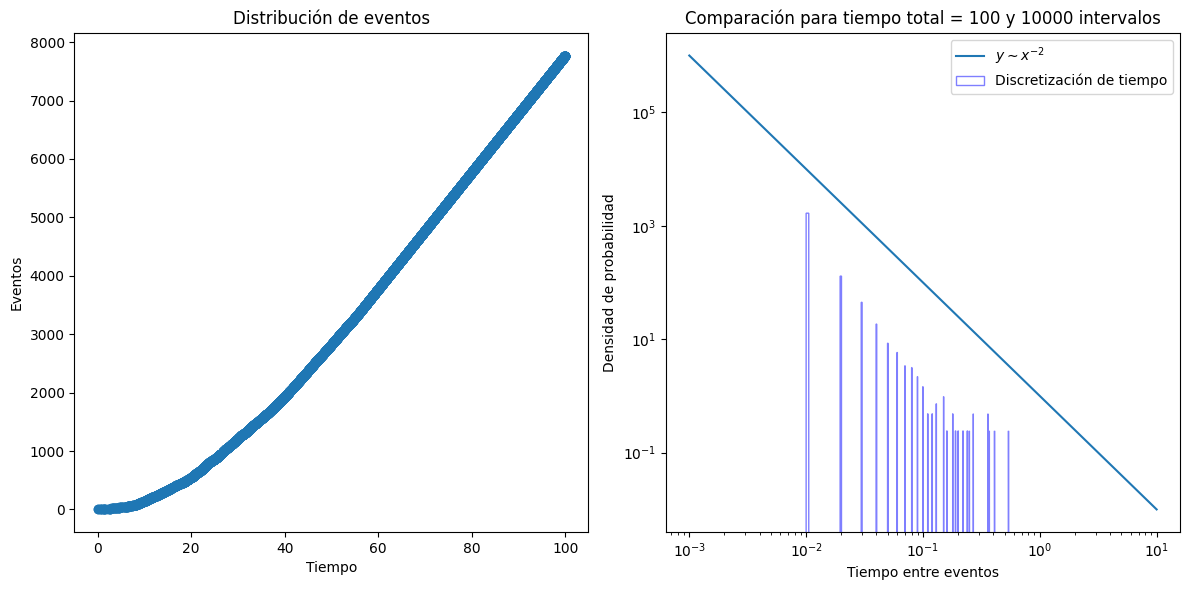

In [6]:
def hawkes_process_discrete(total_time, n_intervals):
    mu = 1.
    n = 1
    rate = mu
    
    dt = total_time / n_intervals
    probabilities = np.random.uniform(size=n_intervals)
    arrival_times= np.array(0.)
    #phi = [] 
    for i in range(len(probabilities)):
        rate = mu +n * np.sum(np.exp(arrival_times-i*dt))
        if probabilities[i] < rate*dt:
            arrival_times = np.append(arrival_times,i*dt)
            #phi.append(np.exp(-arrival_times[i]))
            #rate += n * np.exp(-arrival_times[-1])

    return arrival_times


# Damos valores a los parámetros
total_time = 10**2
n_intervals = total_time*100

# Obtenemos los tiempos de los eventos
arrival_times_discrete = hawkes_process_discrete(total_time, n_intervals)
print(arrival_times_discrete)
# Obtenemos tiempos entre eventos
t_events = np.diff(arrival_times_discrete)


fig = plt.figure(figsize=(12, 6))
axgrid = fig.add_gridspec(1,2)

ax0 = fig.add_subplot(axgrid[0,0])
ax0.plot(arrival_times_discrete, np.arange(len(arrival_times_discrete)), marker = 'o', drawstyle = 'steps-post')
ax0.set_title('Distribución de eventos')
ax0.set_xlabel('Tiempo')
ax0.set_ylabel('Eventos')

ax1 = fig.add_subplot(axgrid[0,1])
x = np.arange(0,10,0.001)
y = 1/x**2
ax1.plot(x, y, label = '$y\sim x^{-2}$')
ax1.hist(t_events, bins=1000, density=True, log=True, alpha=0.5, color='blue', label='Discretización de tiempo', histtype='step' )
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_title(f'Comparación para tiempo total = {total_time} y {n_intervals} intervalos')
ax1.legend()
ax1.set_xlabel('Tiempo entre eventos')
ax1.set_ylabel('Densidad de probabilidad')

fig.tight_layout()
#fig.show()

C:\Users\anton\AppData\Local\Temp\ipykernel_2876\2539418387.py:12: RuntimeWarning: divide by zero encountered in divide
  y = 1/x**2


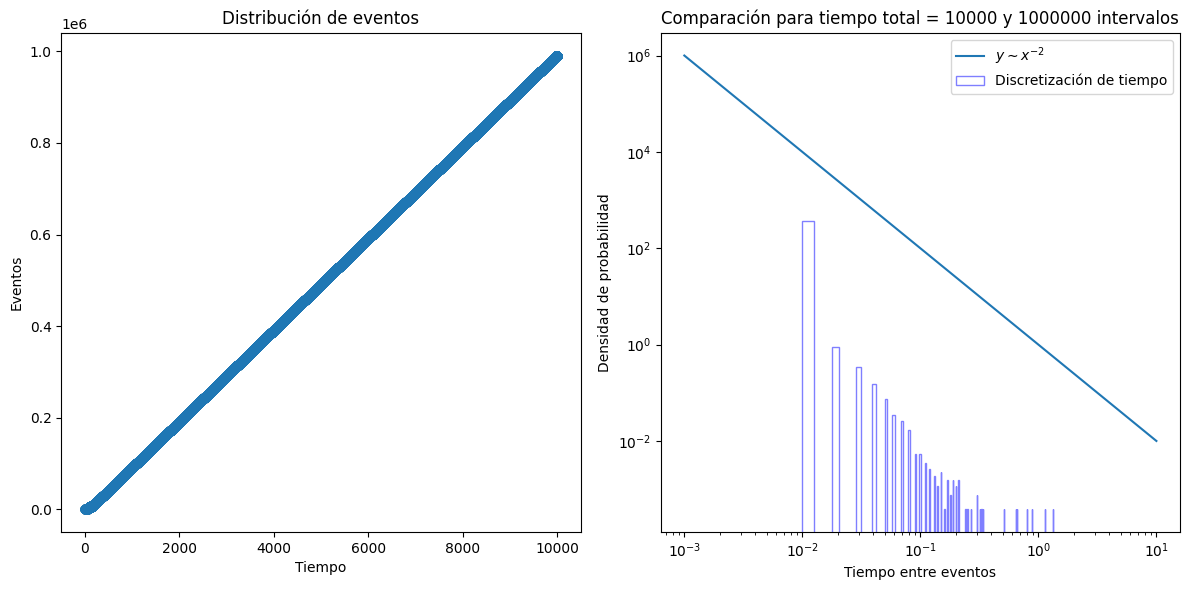

In [28]:
fig = plt.figure(figsize=(12, 6))
axgrid = fig.add_gridspec(1,2)

ax0 = fig.add_subplot(axgrid[0,0])
ax0.plot(arrival_times_discrete, np.arange(len(arrival_times_discrete)), marker = 'o', drawstyle = 'steps-post')
ax0.set_title('Distribución de eventos')
ax0.set_xlabel('Tiempo')
ax0.set_ylabel('Eventos')
ax1 = fig.add_subplot(axgrid[0,1])
#ax1.plot(np.sort(exponential_times), 0.01 * np.exp(-0.01 * np.sort(exponential_times)), color='r', label='Distribución exponencial con $\lambda=\mu=0.01$')
x = np.arange(0,10,0.001)
y = 1/x**2
ax1.plot(x, y, label = '$y\sim x^{-2}$')
ax1.hist(t_events, bins=500, density=True, log=True, alpha=0.5, color='blue', label='Discretización de tiempo', histtype='step' )
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_title(f'Comparación para tiempo total = {total_time} y {n_intervals} intervalos')
ax1.legend()
ax1.set_xlabel('Tiempo entre eventos')
ax1.set_ylabel('Densidad de probabilidad')

fig.tight_layout()
plt.show()

## Algoritmo exacto

C:\Users\anton\AppData\Local\Temp\ipykernel_16440\725487440.py:60: RuntimeWarning: divide by zero encountered in divide
  y = 1/x**2


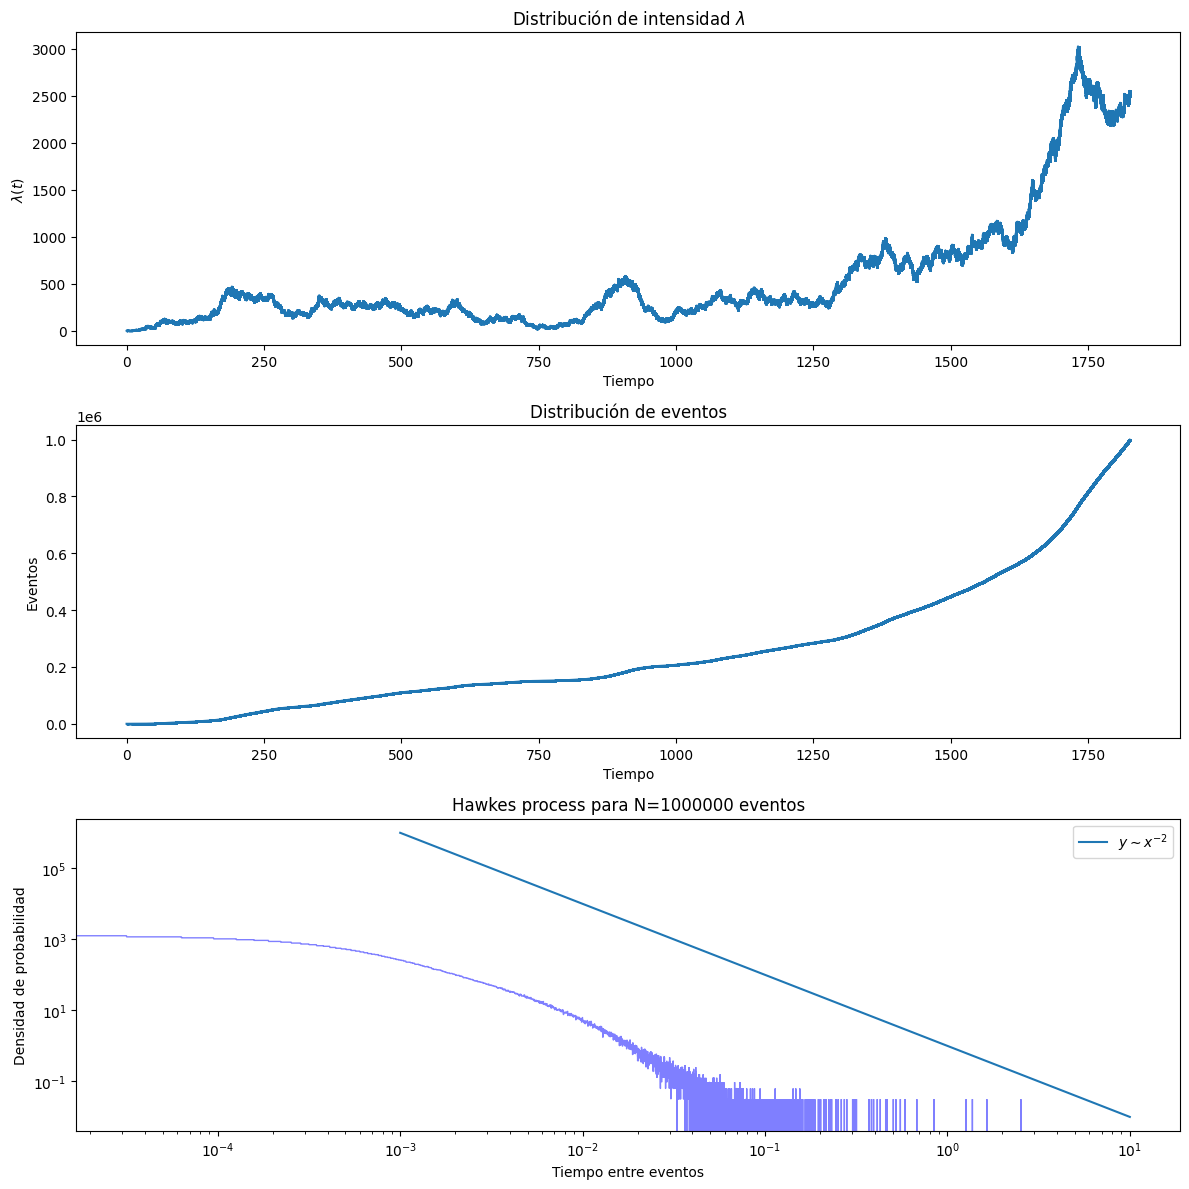

In [88]:
def algorithm(rate, mu, n):
    """
    Algoritmo que calcula el tiempo entre eventos en un proceso de Hawkes y la intensidad

    #Output: rate x_k, x_k
    """                                    
    # Paso 1
    u1 = np.random.uniform()
    if mu == 0:
        F1 = np.inf
    else:
        F1 = -np.log(u1) / mu

    # Paso 2
    u2 = np.random.uniform()
    if (rate - mu) == 0:
        G2 = 0
    else:
        G2 = 1 + np.log(u2) / (rate - mu)
        

    # Paso 3
    if G2 <= 0:
        F2 = np.inf
    else:
        F2 = -np.log(G2)

    # Paso 4
    xk = min(F1, F2)

    # Paso 5
    rate_tk = (rate - mu) * np.exp(-xk) + n + mu
    return rate_tk, xk 


n_events = [0]
times_between_events = [0]
mu = 1
rate = [mu]
N = 10**6
for i in range(N): 
    rate_tk, xk = algorithm(rate[-1], mu, 1)
    rate.append(rate_tk)
    times_between_events.append(xk)
    n_events.append(i + 1)

times = np.cumsum(times_between_events)

fig = plt.figure(figsize=(12, 12))
axgrid = fig.add_gridspec(3,1)

ax0 = fig.add_subplot(axgrid[0,0])
ax0.plot(times, rate, marker = 'o', ms=0.5 ,drawstyle = 'steps')
ax0.set_title('Distribución de intensidad $\lambda$')
ax0.set_xlabel('Tiempo')
ax0.set_ylabel('$\lambda (t)$')

ax1 = fig.add_subplot(axgrid[2,0])
x = np.arange(0,10,0.001)
y = 1/x**2
ax1.plot(x, y, label = '$y\sim x^{-2}$')
ax1.hist(times_between_events, bins='auto', density=True, log=True, alpha=0.5, color='blue', histtype='step' )
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_title(f'Hawkes process para N={n_events[-1]} eventos')
ax1.legend()
ax1.set_xlabel('Tiempo entre eventos')
ax1.set_ylabel('Densidad de probabilidad')

ax2 = fig.add_subplot(axgrid[1,0])
ax2.plot(times, n_events, marker = 'o', ms=0.5 , drawstyle = 'steps-post')
ax2.set_title('Distribución de eventos')
ax2.set_xlabel('Tiempo')
ax2.set_ylabel('Eventos')


fig.tight_layout()
plt.show()


43.88992862291192


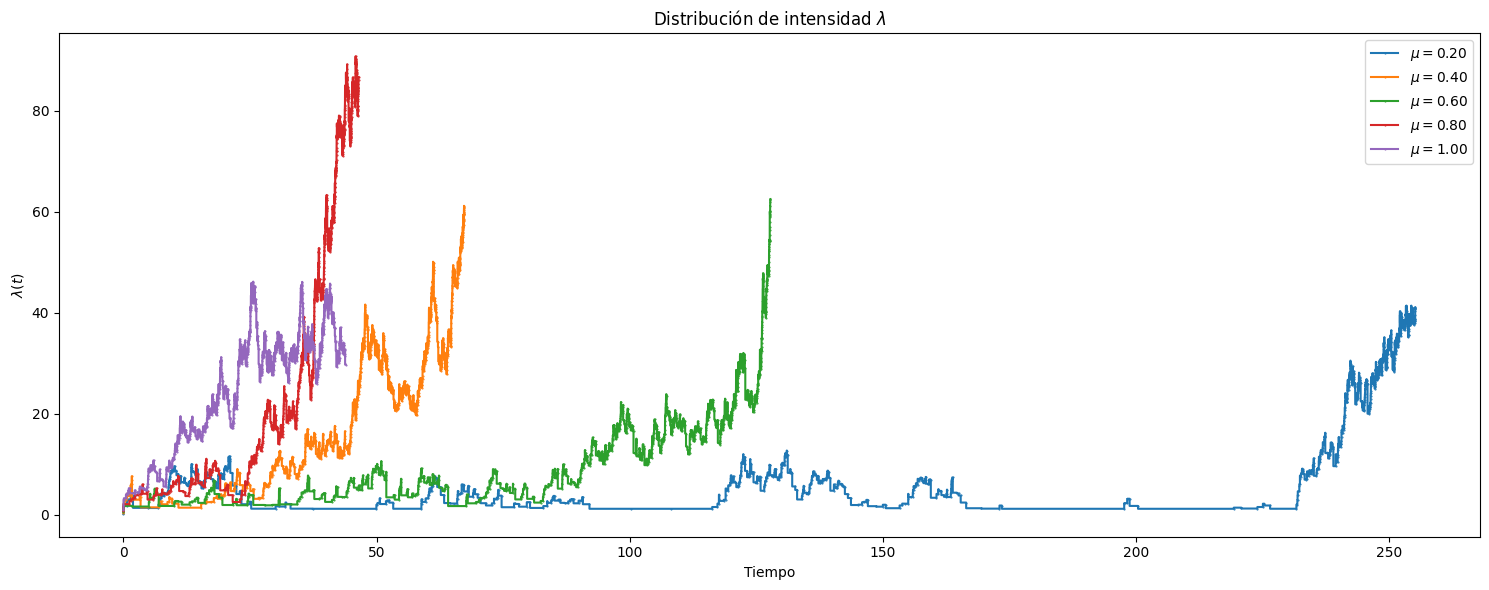

In [8]:
def algorithm(rate, mu, n):
    """
    Algoritmo que calcula el tiempo entre eventos en un proceso de Hawkes y la intensidad

    #Output: rate x_k, x_k
    """                                    
    # Paso 1
    u1 = np.random.uniform()

    if mu == 0:
        F1 = np.inf
    else:
        F1 = -np.log(u1) / mu

    # Paso 2
    u2 = np.random.uniform()

    if (rate - mu) == 0:
        G2 = 1
    else:
        G2 = 1 + np.log(u2) / (rate - mu)
        

    # Paso 3
    if G2 <= 0:
        F2 = np.inf
    else:
        F2 = -np.log(G2)

    # Paso 4
    xk = min(F1, F2)

    # Paso 5
    rate_tk = (rate - mu) * np.exp(-xk) + n + mu
    return rate_tk, xk 


N = 10**3
n = 1
mus = np.arange(0.2, 1.2, 0.2)
plt.figure(figsize=(15, 6))
for mu in mus:
    n_events = [0]
    times_between_events = [0]
    rate = [mu]
    for i in range(N): 
        rate_tk, xk = algorithm(rate[-1], mu, n)
        rate.append(rate_tk)
        times_between_events.append(xk)
        n_events.append(i + 1)
    times = np.cumsum(times_between_events)
    plt.plot(times, rate, marker = 'o', ms=0.5 , drawstyle = 'steps', label = f'$\mu={mu:.2f}$')

print(max(times))

plt.xlabel('Tiempo')
plt.ylabel('$\lambda (t)$')
plt.title('Distribución de intensidad $\lambda$')
plt.legend()
plt.tight_layout()
plt.show()


Hacer un plot con un punto en cada evento en una línea.

# Percolation Strength $P_{\infty}$ plots

In [3]:
def algorithm(rate, mu, n):
    """
    Algoritmo que calcula el tiempo entre eventos en un proceso de Hawkes y la intensidad

    #Output: rate x_k, x_k
    """                                    
    # Paso 1
    u1 = np.random.uniform()

    if mu == 0:
        F1 = np.inf
    else:
        F1 = -np.log(u1) / mu

    # Paso 2
    u2 = np.random.uniform()

    if (rate - mu) == 0:
        G2 = 1
    else:
        G2 = 1 + np.log(u2) / (rate - mu)
        

    # Paso 3
    if G2 <= 0:
        F2 = np.inf
    else:
        F2 = -np.log(G2)

    # Paso 4
    xk = min(F1, F2)

    # Paso 5
    rate_tk = (rate - mu) * np.exp(-xk) + n + mu
    return rate_tk, xk 

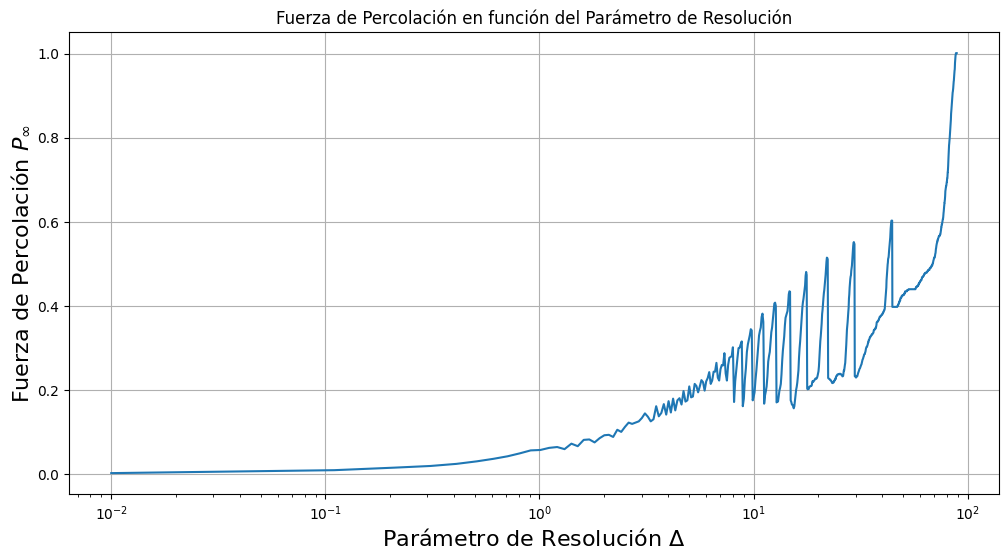

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Generar la serie temporal
N = 10**3
n = 1
mu = 0.1 
n_events = np.arange(0, N+1)
times_between_events = [0]
rate = [mu]
for i in range(N): 
    rate_tk, xk = algorithm(rate[-1], mu, n)
    rate.append(rate_tk)
    times_between_events.append(xk)
times = np.cumsum(times_between_events)

# Definir los parámetros
max_time = int(max(times+1))
min_time = 1
step_size = 0.1

# Calcular la fuerza de percolación para cada valor de delta
percolation_strengths = []
deltas = np.arange(min_time/100, max_time, step_size)

for delta in deltas:
    # Discretizar el tiempo para el valor de delta dado
    discretized_times = np.arange(0, max_time, delta)
    # Contar el número de eventos en cada intervalo
    event_counts = np.zeros(len(discretized_times))

    for i in range(len(discretized_times) - 1):
        event_counts[i] = np.sum((times >= discretized_times[i]) & (times < discretized_times[i + 1]))
    #N_norm = np.sum(event_counts)

    # Encontrar el intervalo con el máximo número de eventos
    max_event_interval_index = np.argmax(event_counts)
    # Calcular la fuerza de percolación (P_inf)
    percolation_strength = event_counts[max_event_interval_index] / N  
    # Añadir la fuerza de percolación a la lista
    percolation_strengths.append(percolation_strength)

# Graficar la fuerza de percolación en función del parámetro de resolución
plt.figure(figsize=(12, 6))
plt.plot(deltas, percolation_strengths)
plt.xlabel('Parámetro de Resolución $\Delta$',fontsize=16)
plt.xscale('log')
plt.ylabel('Fuerza de Percolación $P_{\infty}$', fontsize=16)
plt.title('Fuerza de Percolación en función del Parámetro de Resolución')
plt.grid(True)
plt.show()


In [9]:
print(np.arange(0,20,15))

[ 0 15]


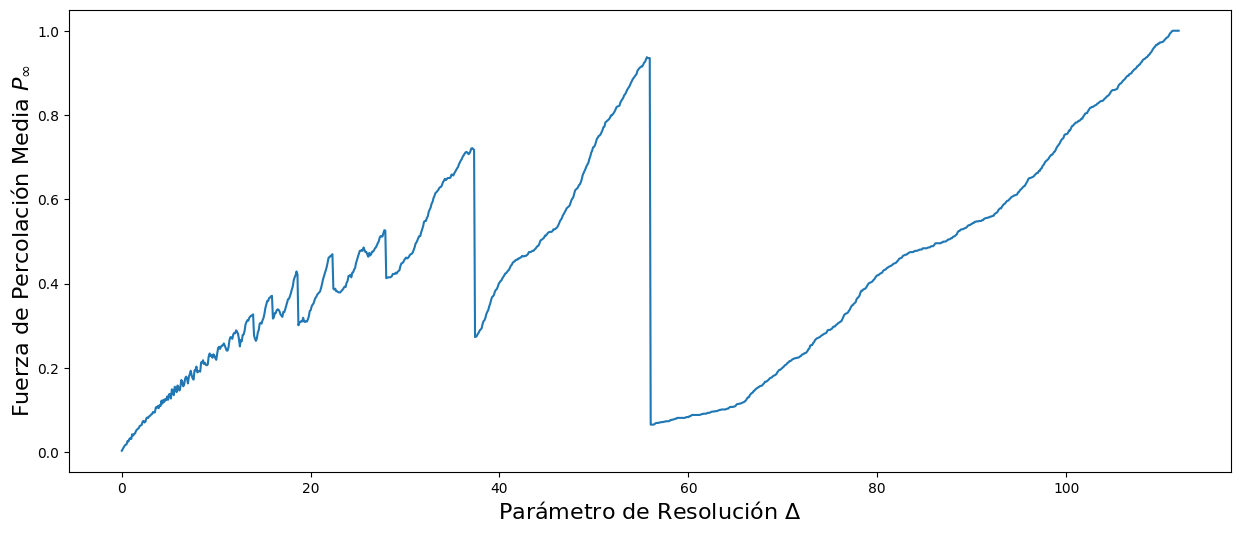

In [15]:
plt.figure(figsize=(15, 6))
plt.plot(deltas, percolation_strengths)
plt.xlabel('Parámetro de Resolución $\Delta$',fontsize=16)
plt.ylabel('Fuerza de Percolación Media $P_{\infty}$', fontsize=16)
plt.show()


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

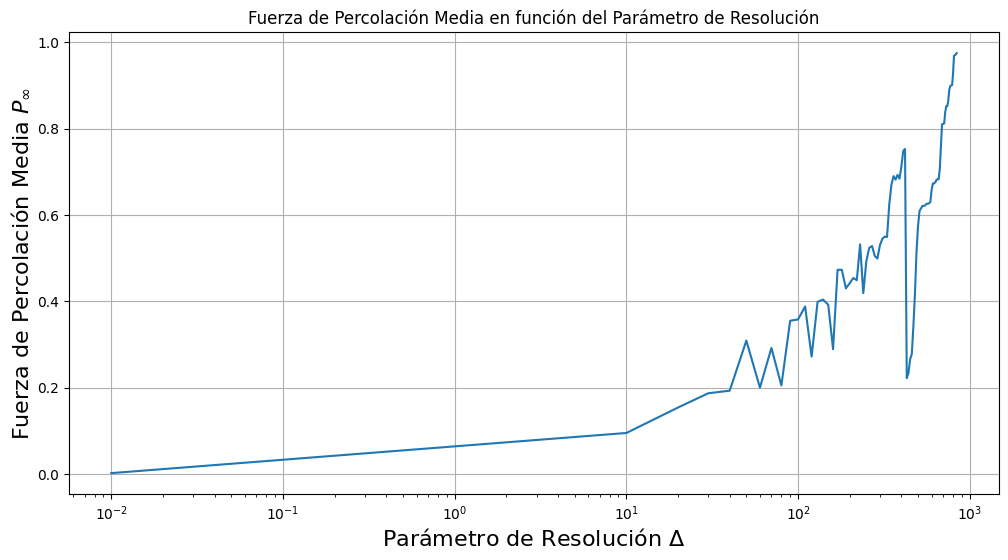

In [51]:
N = 10**3
n = 1
mu = 0.1 
n_events = np.arange(0, N+1)
times_between_events = [0]
rate = [mu]
for i in range(N): 
    rate_tk, xk = algorithm(rate[-1], mu, n)
    rate.append(rate_tk)
    times_between_events.append(xk)
times = np.cumsum(times_between_events)

# Definir los parámetros
max_time = int(max(times) + 1)
min_time = 1
step_size = 10

# Número de veces que se repetirá el cálculo
num_iterations = 1000

# Lista para almacenar las fuerzas de percolación de cada iteración
percolation_strengths_list = []

for _ in range(num_iterations):
    # Calcular la fuerza de percolación para cada valor de delta
    percolation_strengths = []
    deltas = np.arange(min_time/100, max_time, step_size)

    for delta in deltas:
        # Discretizar el tiempo para el valor de delta dado
        discretized_times = np.arange(0, max_time, delta)
        # Contar el número de eventos en cada intervalo
        event_counts = np.zeros(len(discretized_times))

        for i in range(len(discretized_times) - 1):
            event_counts[i] = np.sum((times >= discretized_times[i]) & (times < discretized_times[i + 1]))

        # Encontrar el intervalo con el máximo número de eventos
        max_event_interval_index = np.argmax(event_counts)
        # Calcular la fuerza de percolación (P_inf)
        percolation_strength = event_counts[max_event_interval_index] / N  
        # Añadir la fuerza de percolación a la lista
        percolation_strengths.append(percolation_strength)
    
    # Almacenar las fuerzas de percolación de esta iteración
    percolation_strengths_list.append(percolation_strengths)
    print(_)
# Calcular la media de las fuerzas de percolación para cada parámetro
mean_percolation_strengths = np.mean(percolation_strengths_list, axis=0)


# Graficar la fuerza de percolación media en función del parámetro de resolución
plt.figure(figsize=(15, 6))
plt.plot(deltas, mean_percolation_strengths)
plt.xlabel('Parámetro de Resolución $\Delta$',fontsize=16)
plt.xscale('log')
plt.ylabel('Fuerza de Percolación Media $P_{\infty}$', fontsize=16)
plt.grid(True)
plt.show()


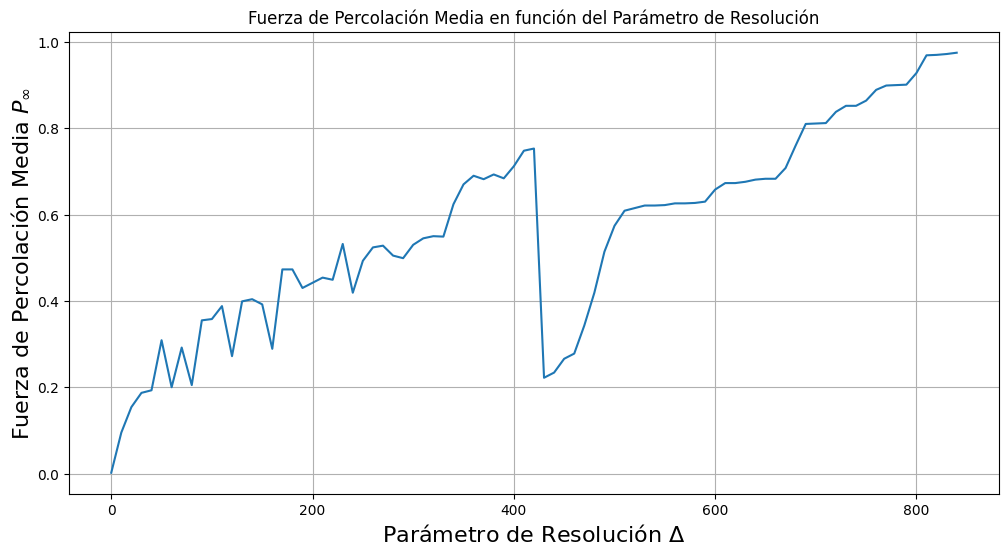

In [52]:
plt.figure(figsize=(15, 6))
plt.plot(deltas, mean_percolation_strengths)
plt.xlabel('Parámetro de Resolución $\Delta$',fontsize=16)
plt.ylabel('Fuerza de Percolación Media $P_{\infty}$', fontsize=16)
plt.show()


# Cosas por cambiar.
- Dividir entre N_norm, para que cuando el delta sea grande, dividir entre el número de eventos que contamos, que puede ser menor a N
- Se podría cambiar el Delta para que pille número entero siempre , aunque esto a lo mejor no renta una vez cambiada la normalización
- Cambiar la "definición de cluster" Ir añadiendo eventos siempre que el tiempo entre eventos sea menor que delta, cada vez que se cumpla, añadir un evento, cuando esto no se cumple se acabaría el cluster.

## Hacer un notebook solo para Hawkes corregido